In [24]:
import numpy as np

import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.optimize as optimize
import scipy.stats as stats

In [25]:
# Values taken from Planck Collaboration 2018
# (https://arxiv.org/abs/1807.06209)
H_0 = 67.66
Om_lambd = 0.6889
Om_m = 0.3111

def integrand(x):
    return (1/H_0) * (1 + x) / np.sqrt(Om_lambd + (1 + x)**3 * Om_m)

def D(z):
    return integrate.quad(lambda x: integrand(x), 0, z)[0]

# Values from Table 1. Note that I've listed a redshift they assumed
# for all long GRBs, 1.38, for the long GRBs for which a measured
# redshift was not obtained.
energies = np.array([98.5, 86.5, 61.7, 86.1, 186.6, 134.2, 66.7])
times = np.array([15446, 160909, 73690, 187050, 229039, 135731, 23286])
redshifts = np.array([1.38, 1.38, 1.38, 1.38, 1.38, 0.6, 1.38])
Ks = energies * np.array([D(z) for z in redshifts])/D(1)

# This is the above but excluding the neutrino that seems to be doing
# some of the heavy lifting, associated with GRB 120219A.
Ks_mask = (Ks < 150)
masked_energies = energies[Ks_mask]
masked_times = times[Ks_mask]
masked_redshifts = redshifts[Ks_mask]
masked_Ks = Ks[Ks_mask]

Fit with all neutrinos:
Slope: 902.9635684947169 +/- 187.55433673225326
R-squared: 0.3029931024335172

Fit without GRB 120219A neutrino:
Slope: 913.4508076553784 +/- 287.73047428766756
R-squared: -0.07864705298562957


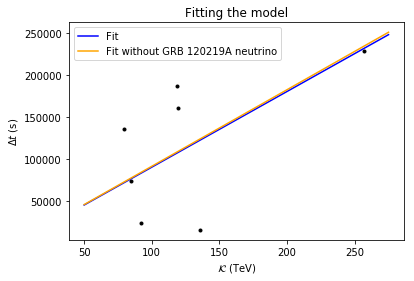

In [51]:
# Note that the model requires a y-intercept of 0! This means that
# while the authors do a fit, they are *not* fitting the y-intercept,
# so this isn't a full best-fit.
def line(x, m):
    return m*x

popt, pcov = optimize.curve_fit(line, Ks, times)
m_best = popt[0]
print('Fit with all neutrinos:')
print('Slope: {} +/- {}'.format(popt[0], np.sqrt(pcov[0][0])))

resids = times - line(Ks, m_best)
ss_res = np.sum(resids**2)
ss_tot = np.sum((times - np.mean(times))**2)
R2 = 1 - ss_res/ss_tot
print('R-squared: {}'.format(R2))
print()

mask_popt, mask_pcov = optimize.curve_fit(line, masked_Ks, masked_times)
m_best_masked = mask_popt[0]
print('Fit without GRB 120219A neutrino:')
print('Slope: {} +/- {}'.format(mask_popt[0], np.sqrt(mask_pcov[0][0])))

resids = masked_times - line(masked_Ks, m_best_masked)
ss_res = np.sum(resids**2)
ss_tot = np.sum((masked_times - np.mean(masked_times))**2)
R2 = 1 - ss_res/ss_tot
print('R-squared: {}'.format(R2))

K_linspace = np.linspace(50, 275, 1000)

plt.plot(Ks, times, 'k.')
plt.plot(K_linspace, line(K_linspace, m_best), 'b', label='Fit')
plt.plot(K_linspace, line(K_linspace, m_best_masked), 'orange', label='Fit without GRB 120219A neutrino')
plt.xlabel('$\mathcal{K}$ (TeV)')
plt.ylabel('$\Delta t$ (s)')
plt.title('Fitting the model')
plt.legend()
plt.show()

Fit with all neutrinos:
Slope: 759.6705366297546 +/- 499.25951597684895
R-squared: 0.31649633429369417

Fit without GRB 120219A neutrino:
Slope: 28.557358914171573 +/- 1606.9605226668086
R-squared: 7.89468298958429e-05


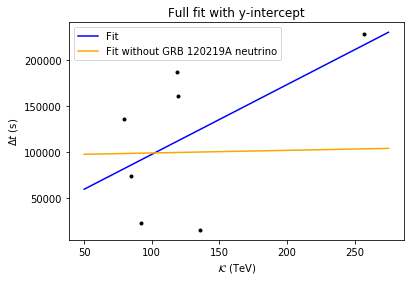

In [52]:
# Repeating the above, allowing a y-intercept this time.
def line_with_int(x, m, b):
    return m*x + b

popt, pcov = optimize.curve_fit(line_with_int, Ks, times)
m_best, b_best = popt
print('Fit with all neutrinos:')
print('Slope: {} +/- {}'.format(popt[0], np.sqrt(pcov[0][0])))

resids = times - line_with_int(Ks, m_best, b_best)
ss_res = np.sum(resids**2)
ss_tot = np.sum((times - np.mean(times))**2)
R2 = 1 - ss_res/ss_tot
print('R-squared: {}'.format(R2))
print()

mask_popt, mask_pcov = optimize.curve_fit(line_with_int, masked_Ks, masked_times)
m_best_masked, b_best_masked = mask_popt
print('Fit without GRB 120219A neutrino:')
print('Slope: {} +/- {}'.format(mask_popt[0], np.sqrt(mask_pcov[0][0])))

resids = masked_times - line_with_int(masked_Ks, m_best_masked, b_best_masked)
ss_res = np.sum(resids**2)
ss_tot = np.sum((masked_times - np.mean(masked_times))**2)
R2 = 1 - ss_res/ss_tot
print('R-squared: {}'.format(R2))

K_linspace = np.linspace(50, 275, 1000)

plt.plot(Ks, times, 'k.')
plt.plot(K_linspace, line_with_int(K_linspace, m_best, b_best), 'b', label='Fit')
plt.plot(K_linspace, line_with_int(K_linspace, m_best_masked, b_best_masked), 'orange', label='Fit without GRB 120219A neutrino')
plt.xlabel('$\mathcal{K}$ (TeV)')
plt.ylabel('$\Delta t$ (s)')
plt.title('Full fit with y-intercept')
plt.legend()
plt.show()

In [53]:
print('Correlation coefficient: {}.'.format(stats.pearsonr(Ks, times)[0]))
print('Correlation coefficient without GRB 120219A neutrino: {}.'.format(stats.pearsonr(masked_Ks, masked_times)[0]))

Correlation coefficient: 0.562580069228989.
Correlation coefficient without GRB 120219A neutrino: 0.008885202861900216.
